/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.0000e+00 - loss: 2.2163 - val_accuracy: 0.0000e+00 - val_loss: 2.1285
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 2.1828 - val_accuracy: 0.0000e+00 - val_loss: 1.9745
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 2.0259 - val_accuracy: 0.0000e+00 - val_loss: 1.8257
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1168 - loss: 1.9734 - val_accuracy: 0.3333 - val_loss: 1.6980
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3214 - loss: 1.8041 - val_accuracy: 0.3667 - val_loss: 1.5909
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3394 - loss: 1.6427 - val_accuracy: 0.3667 - val_loss: 1.4956
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3652 - loss: 1.4885 - val_accuracy: 0.3667 - val_loss: 1.4084
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4047 - loss: 1.3713 - val_ac

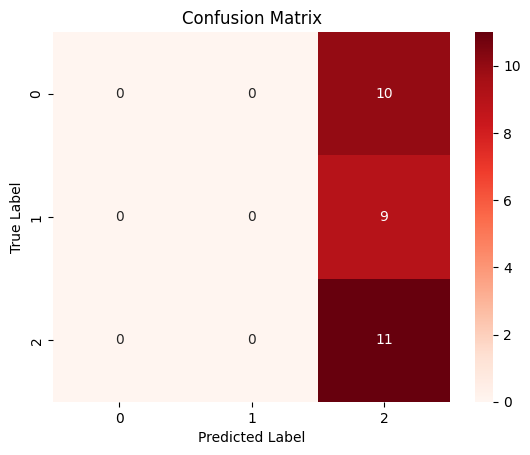

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model and capture the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)

# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Convert one-hot encoded y_test back to labels
y_test_labels = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()
